<a href="https://colab.research.google.com/github/MethmaPeiris99/ArtZen-Image-Captioning/blob/main/Image_Captioning_with_COCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### References:
*   [Interacting with Open COCA](https://colab.research.google.com/github/mlfoundations/open_clip/blob/master/docs/Interacting_with_open_coca.ipynb#scrollTo=oOaE1AmDyth_)
*   [Creating captions with Open CLIP](https://colab.research.google.com/github/robgon-art/open-clip/blob/main/Create_Captions_with_OpenCLIP.ipynb#scrollTo=u7iSUDsopGxE)
*   [Using OpenCLIP for Image Search and Automatic Captioning](https://towardsdatascience.com/using-openclip-for-image-search-and-automatic-captioning-fa1cbbd48ce4)

In [8]:
!pip install open_clip_torch transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.8 MB/s eta 0:00:00


In [9]:
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [10]:
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
painting_directory = "/content/drive/MyDrive/Colab Notebooks/WikiArt Dataset/Animal Paintings"

training_images = os.listdir(painting_directory)

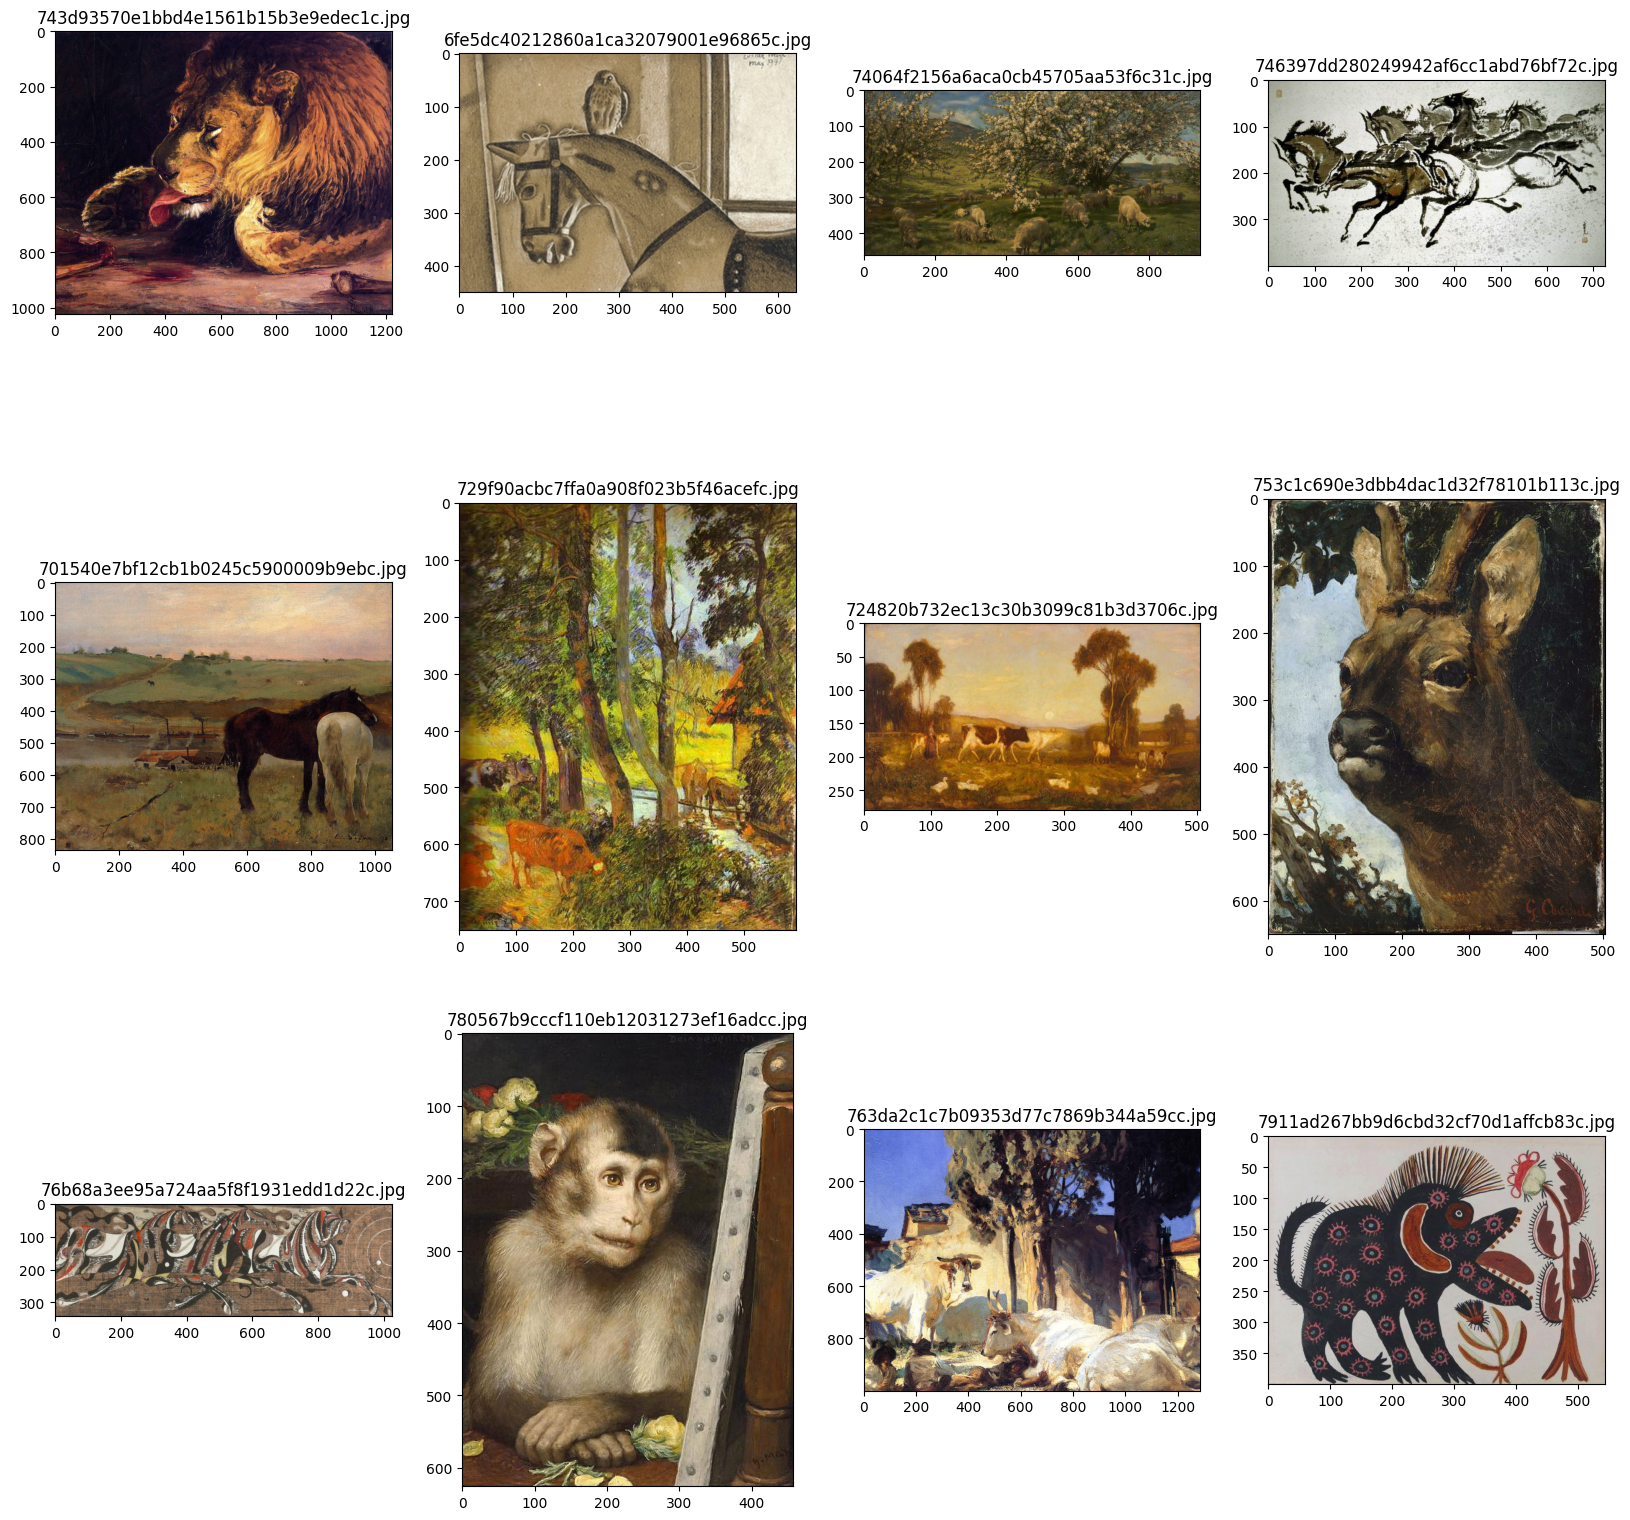

In [ ]:
figure = plt.figure(figsize = (20,20))  
num_rows = 3 
num_columns = 4

for index in range(0, num_rows*num_columns):
  figure.add_subplot(num_rows, num_columns, index+1) 
  image = Image.open(f"{painting_directory}/{training_images[index]}")
  numpy_image = np.asarray(image)
  plt.imshow(numpy_image)
  plt.title(training_images[index])

In [12]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [13]:
image_caption_dictionary = {}  # Create a dictionary to store image name and it's corresponding caption as key-value pairs
image_count = 1493

for index in range(1493, len(training_images)):
  image = Image.open(f"{painting_directory}/{training_images[index]}").convert("RGB")
  image = transform(image).unsqueeze(0)
  image_count += 1
  print("Image ", image_count)

  with torch.no_grad(), torch.cuda.amp.autocast():
    generated = model.generate(image)

  image_caption_dictionary[training_images[index]] = open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", "")

Image  1494
Image  1495
Image  1496
Image  1497
Image  1498
Image  1499
Image  1500
Image  1501
Image  1502
Image  1503
Image  1504
Image  1505
Image  1506
Image  1507
Image  1508
Image  1509
Image  1510
Image  1511
Image  1512
Image  1513
Image  1514
Image  1515
Image  1516
Image  1517
Image  1518
Image  1519
Image  1520
Image  1521
Image  1522
Image  1523
Image  1524
Image  1525
Image  1526
Image  1527
Image  1528
Image  1529
Image  1530
Image  1531
Image  1532
Image  1533
Image  1534
Image  1535
Image  1536
Image  1537
Image  1538
Image  1539
Image  1540
Image  1541
Image  1542
Image  1543
Image  1544
Image  1545
Image  1546
Image  1547
Image  1548
Image  1549
Image  1550
Image  1551
Image  1552
Image  1553
Image  1554
Image  1555
Image  1556
Image  1557
Image  1558
Image  1559
Image  1560
Image  1561
Image  1562
Image  1563
Image  1564
Image  1565
Image  1566
Image  1567
Image  1568
Image  1569
Image  1570
Image  1571
Image  1572
Image  1573
Image  1574
Image  1575
Image  1576
Imag

In [14]:
print(len(image_caption_dictionary))

306


In [15]:
import pickle

In [16]:
with open('/content/drive/MyDrive/Colab Notebooks/StackGAN/new_data_pickle.pkl', 'wb') as pickle_file:
    pickle.dump(image_caption_dictionary, pickle_file)